#1 In 250-500 words, write a thorough explanation in markdown in your notebook of when to use ML and when not to. Do NOT go over the 500-word limit. It is essential to express this concisely. You may need to do additional research on this than what exists in the readings.

Machine Learning is an impressive and modern tool that can be used for a variety of purposes within a lot of industries, as training a model via algorithms can lead to fully automated processes that would have taken more time and resources for a human to perform. However, we must know when it is effective to use these algorithms, as there are certain scenarios in which Machine Learning will not be of much help or it will not be useful at all. For example, repetitive tasks with large amounts of data might be better suited for a Machine Learning algorithm, as it can greatly decrease the time in which the data is processed, as well as manage quickly repeated behavior, depending on the training it had. Another use Machine Learning might have is when presented with patterns, as algorithms are designed to identify them rather quickly, which can be useful when doing online recommendations, for example.

There are other times when Machine Learning would not be as useful as one might think, for example, if the data we are working with does not have enough labels to differentiate between them, as this can cause errors when displaying the data or when asking the algorithm to interpret it for us. In professional environments, this problem could potentially lead to misinformation and mistakes in future strategies. Another time when Machine Learning might be worse than actual, human interpretations, is when situations get too subjective and different from each other, as this might require a higher level of experience or rapidly changing problem-solving, which most algorithms are not able to do in the present day.

In [31]:
#2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("loans_full_schema.csv")
df.head(5)

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [33]:
#2(a)
df.columns = df.columns.str.strip()

df["emp_length"] = df["emp_length"].astype(float)
df["annual_income"] = df["annual_income"].astype(float)
df["emp_length"] = df["emp_length"].astype(float)
df["debt_to_income"] = df["debt_to_income"].astype(float)
df["emp_length"] = df["emp_length"].astype(float)
df["annual_income_joint"] = df["annual_income_joint"].astype(float)
df["debt_to_income_joint"] = df["debt_to_income_joint"].astype(float)
df["balance"] = df["balance"].astype(float)
df["paid_total"] = df["paid_total"].astype(float)
df["paid_principal"] = df["paid_principal"].astype(float)
df["paid_interest"] = df["paid_interest"].astype(float)
df["paid_late_fees"] = df["paid_late_fees"].astype(float)

df["issue_month"] = pd.to_datetime(df["issue_month"], format = "mixed")
df["issue_month"] = df["issue_month"].dt.strftime("%m/%Y")

df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,03/2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,02/2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,02/2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,01/2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,03/2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [34]:
df.dtypes

emp_title                            object
emp_length                          float64
state                                object
homeownership                        object
annual_income                       float64
verified_income                      object
debt_to_income                      float64
annual_income_joint                 float64
verification_income_joint            object
debt_to_income_joint                float64
delinq_2y                             int64
months_since_last_delinq            float64
earliest_credit_line                  int64
inquiries_last_12m                    int64
total_credit_lines                    int64
open_credit_lines                     int64
total_credit_limit                    int64
total_credit_utilized                 int64
num_collections_last_12m              int64
num_historical_failed_to_pay          int64
months_since_90d_late               float64
current_accounts_delinq               int64
total_collection_amount_ever    

open_credit_lines             num_satisfactory_accounts       0.999481
num_satisfactory_accounts     open_credit_lines               0.999481
paid_total                    paid_principal                  0.991473
paid_principal                paid_total                      0.991473
installment                   loan_amount                     0.944517
loan_amount                   installment                     0.944517
                              balance                         0.926557
balance                       loan_amount                     0.926557
num_historical_failed_to_pay  tax_liens                       0.871625
tax_liens                     num_historical_failed_to_pay    0.871625
dtype: float64

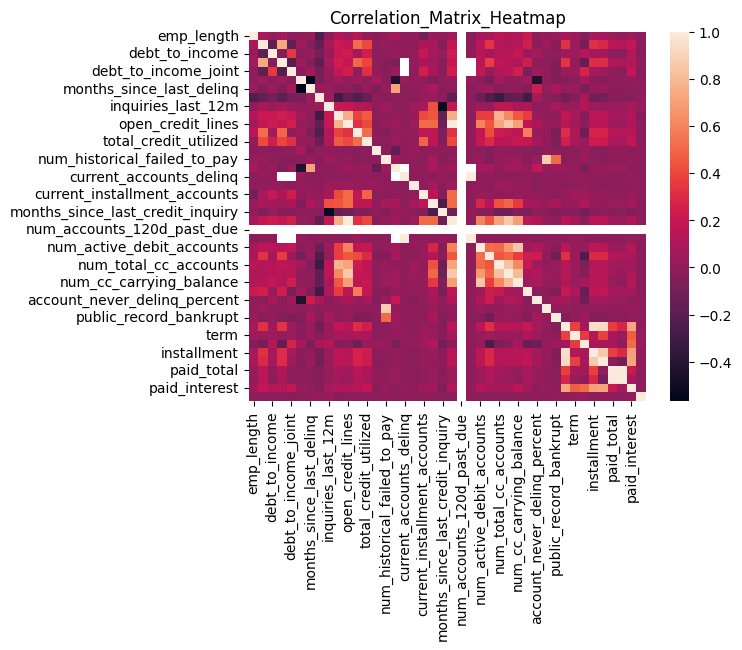

In [46]:
#3

num_df = df.select_dtypes(include = ["int64","float64"])
sns.heatmap(num_df.corr(), annot = False)
plt.title("Correlation_Matrix_Heatmap")
plt.show

f_correlations = num_df.corr().abs().unstack().sort_values(ascending = False)
h_featured_corr = f_correlations [f_correlations < 1.0].head(10)

h_featured_corr

#3(a) Summary:
It can be observed that the open credit lines and the number of satisfactory accounts have a strong and positive correlation, according to the data shown by the heatmap and the result of the correlation matrix, which gives us a value of 0.99. 
I only did the numerical values by including int and float columns, so that there weren't any weird strings or objects within the statistical representation.

Text(0.5, 1.0, 'Box_and_Whisker_Plot_for_loan_amounts')

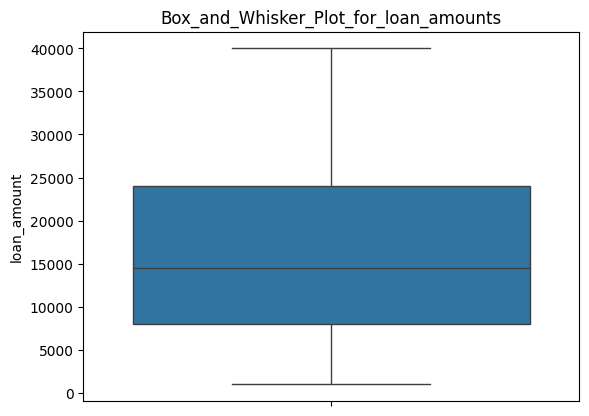

In [49]:
#4
if df["loan_amount"].isnull().any():
    df["loan_amount"].fillna(df["loan_amount"].median(),inplace = True)
    

sns.boxplot(df["loan_amount"])
plt.title("Box_and_Whisker_Plot_for_loan_amounts")

#4(a) Explanation
The Median is located at around 15000.

The way I managed null values was by an isnull and fillna function within the column and replaced them with the median of the data,
as the box and whisker plot would show me the median value either way.

In [52]:
pip install realpython-reader

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for html2text: filename=html2text-2024.2.26-py3-none-any.whl size=33132 sha256=eb263163f5ca2fc80b4b94b6b29a2906b152673de32e10f1cf6bb07d69ce6fa2
  Stored in directory: c:\users\jagz0\appdata\local\pip\cache\wheels\4a\af\14\e28d92a6cb558e73559e73d480b75629263d809dd0fc7363be
  Created wheel for sgmllib3k: filename=sgmllib3k-1

In [60]:
#5
import time

def region_assignment(state):
    Pacific = ['WA', 'HI', 'CA', 'OR', 'AK']
    Plains = ['WY', 'NE', 'MT', 'SD', 'ND']
    Midwest = ['MO', 'MI', 'KS', 'IL', 'ID', 'IA', "MN", 'WI', 'OH']
    Northeast = ['NY', 'NJ', 'NH','VT', 'RI', 'PA', 'CT','MA','ME']
    South = ['VA','TX','TN','OK','SC','NC','WV', 'MS','MD','FL','KY','LA','GA','DE','AL','AR']

    if state in Pacific:
        return "Pacific"
    elif state in Plains:
        return "Plains"
    elif state in Midwest:
        return "Midwest"
    elif state in Northeast:
        return "Northeast"
    else:
        return "South"


time_start_lambda_1 = time.time()
df["lambda_regions"] = df["state"].apply(lambda x: region_assignment(x))
time_end_lambda_1 = time.time() - time_start_lambda_1


state_assignment = {'WA':'Pacific','HI':'Pacific','CA':'Pacific','OR':'Pacific','AK':'Pacific',
                    'WY':'Plains','NE':'Plains','MT':'Plains','SD':'Plains','ND':'Plains',
                    'MO':'Midwest','MI':'Midwest','KS':'Midwest','IL':'Midwest','ID':'Midwest','IA':'Midwest',
                    'MN':'Midwest','WI':'Midwest','OH':'Midwest', 'NY':'Northeast','NJ':'Northeast','NH':'Northeast',
                    'VT':'Northeast','RI':'Northeast','PA':'Northeast','CT':'Northeast','MA':'Northeast','ME':"Northeast"}

time_start_lambda_2 = time.time()
df['lambda_st_to_regions'] = df['state'].apply (lambda x: state_assignment.get(x, "South"))
time_end_lambda_2 = time.time() - time_start_lambda_2

time_comparison = {"Lambda 1 Performance Time" : time_end_lambda_1,
                   "Lambda 2 Performance Time" : time_end_lambda_2}

time_comparison

{'Lambda 1 Performance Time': 0.01694321632385254,
 'Lambda 2 Performance Time': 0.004544734954833984}

#5(a) Findings
The second lambda function used (lambda_st_to_regions), which assigns regions to states instead of vice versa and defaults states to south if not assigned in other, is faster at processing than the lambda function that assigns states to regions.

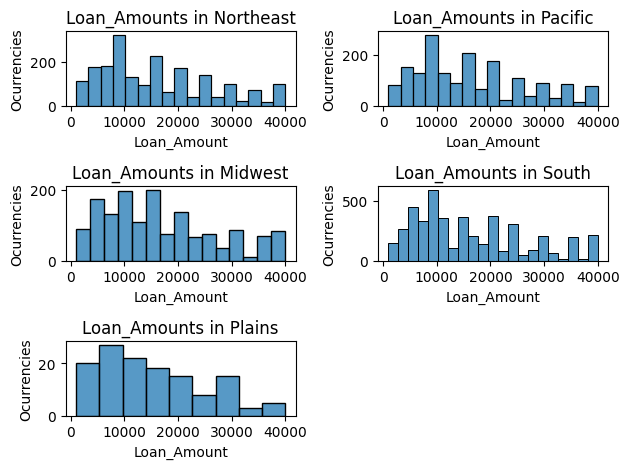

In [71]:
#6 
regions = df['lambda_st_to_regions'].unique()

for i, region in enumerate(regions, 1):
    plt.subplot(3,2,i)
    sns.histplot(df[df['lambda_st_to_regions'] == region]['loan_amount'])
    plt.title(f'Loan_Amounts in {region}')
    plt.xlabel('Loan_Amount')
    plt.ylabel('Ocurrencies')

plt.tight_layout()

#6(a) Findings

In the subplots made from each region, it can be deduced that the region that makes the most loans is the South region.
The region that makes the least amount of loans is the Plains region, it barely goes above 20.
All of the histograms are skewed in some way, right-skewed.